# 第4章 ケモインフォマティクス

## **ケモインフォマティクス** (化学情報学):
- 薬剤候補化合物の特徴を解析して、求めたい薬物活性との相関を半経験的にルール化していく「**リガンドベース**」アプローチ
- **化学分野**と**情報科学分野**を融合した領域
- バイオインフォマティクスと合わせてインシリコ創薬を支える

### ケモインフォマティクスに基づく創薬戦略 （Ligand Based Drug Desin: LBDD）:
- 化学空間解析
- 構造活性相関解析
- 類縁化合物探索
- Lead/Scaffold hopping
など

### LBDDの特徴
1. タンパク質の構造情報が未知でも実行可能
2. 研究の歴史が長い
   - 多くの手法が開発されている
   - ほとんどが計算コストがかからない
3. 得られたヒット化合物に参照活性化合物と同等の活性レベル・作用機序が期待できる

## 4.1 分子表現

### 4.1.1 線形表現
**線形表現**: 化合物構造を**文字列や数字の連続な線**として表示する一次元の表現方法
- 代表的な線形表記
  - IUPAC命名法
  - SMILES
  - InChI


#### SMILES

- Divid Weininger によって提案(1986)
- 化学構造情報が高度に圧縮・単純化
- **最も利用されている**代表的な線形表記
- 多くの派生言語がある
  - XSMILES (kekule式)
    - Daylight 社による芳香族表記などを排除した中立フォーマットらしい（[参考](https://www.daylight.com/meetings/summerschool98/course/dave/smiles-relatives.html)）
    - `xsmiles`と検索して出てくる [XSMILES](https://github.com/Bayer-Group/xsmiles)（機械学習可視化ツール）とは異なる
  - **SMARTS** (部分構造・パターン表記)
  - SMIRKS　（反応式表記）
  - CHUCKLES CHORTLES CHARTS （アミノ酸・高分子・モノマー表記）

##### SMILESの基本規則
1. 原子は、原子記号により表示する
2. 水素原子は自動的に自由原子価を飽和するが、単純な水素の結合は省略する
3. 隣接する原子はお互いに隣に置く
4. 二重結合と三重結合は`=`と`#`で指定する
5. 分岐は括弧により表す
6. 環は接続している二つの原子に数値を割り当てることによって記述する
7. 芳香族・共役系構造は、すべての原子を小文字で書く

> 細かいルールは[こちら（daylight社のSMILES）](https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)
> <br>というかほとんどこの教科書のSMILESの説明はここに書かれているまんまである

このようなルールに従うため、SMILESは構造情報の圧縮だけでなく、構造展開のルールデータベースとしての表現にも利用されている（SMARKSを利用）
<br>→構造改変に活用 （例: Abbot社　[Drug Guru](https://doi.org/10.1016/j.bmc.2006.06.024)$^*$）
> 教科書のDrugGnuはtypoでDrug Guruが正解

##### SMILESの一位性
SMILESはDaylight社が独自で開発している
ルールは詳細になっているが **生成アルゴリズムの詳細は各ソフトウェアによって異なる**
<br>→ 「**一意生**」という点が失われる

> **Canonical SMILES** という正則化された表記方法もある

#### InChI

- 米国標準技術局で開発
- 生成や入出力のアルゴリズムの詳細まですべてオープン
- 比較的一意に決まっている
- 表記が長くなってしまうという欠点


##### InChI の基本構造

InChIは以下のような形式で記述される：

```
InChI=バージョン/主層/可選層...
```

たとえば、エタノールのInChIは：

```
InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3
```

##### 各層の意味（基本構成）

1. **バージョン情報**：

   * `1S` は標準InChI（Standard InChI）バージョン1であることを示します。

2. **主層**：

   * **化学式（Formula）**：例 `C2H6O`
   * **スケルトン接続（Connectivity）**：例 `c1-2-3`
   * **水素原子の配置（Hydrogen）**：例 `h3H,2H2,1H3`

3. **可選層**（必要に応じて追加されます）：

   * **立体化学（/t, /m, /s）**
   * **異性体情報**
   * **電荷情報**
   * **同位体情報**

##### InChIの例（エタノール、酢酸）

| 化合物名  | InChI                                   |
| ----- | --------------------------------------- |
| エタノール | `InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3`     |
| 酢酸    | `InChI=1S/C2H4O2/c1-2(3)4/h1H3,(H,3,4)` |

##### InChIKey

InChIは長いので、検索や照合のためにハッシュ化された短い識別子 **InChIKey** がよく使われる

> 教科書の `[c]1([n+]([CH3])[c]([c]2([c]([n+]1[CH3])[n][cH][n+]2[CH3]))[O-])[O-]`というInChIはInChIではない

---
## RDKitを使ってSMILESとInChIを確認してみよう

In [61]:
# ライブラリのインポート
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

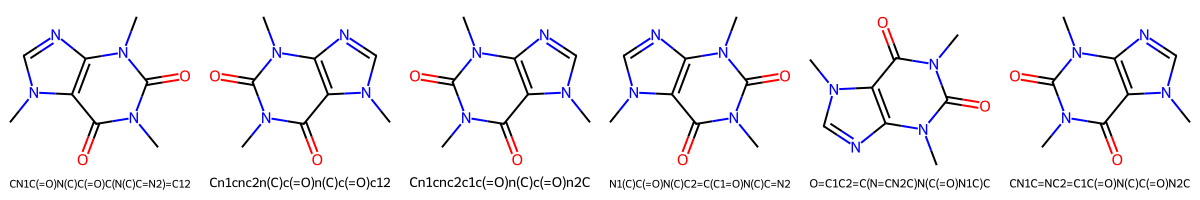

In [63]:
caffeine_list = [ # 全てカフェインのSMILES
    'CN1C(=O)N(C)C(=O)C(N(C)C=N2)=C12',
    'Cn1cnc2n(C)c(=O)n(C)c(=O)c12',
    'Cn1cnc2c1c(=O)n(C)c(=O)n2C',
    'N1(C)C(=O)N(C)C2=C(C1=O)N(C)C=N2',
    'O=C1C2=C(N=CN2C)N(C(=O)N1C)C',
    'CN1C=NC2=C1C(=O)N(C)C(=O)N2C'
]
mols = [Chem.MolFromSmiles(smi) for smi in caffeine_list] # カフェインのSMILESをモルに変換
Draw.MolsToGridImage(mols, legends=caffeine_list, molsPerRow=len(caffeine_list)) # 構造の表示

異なるSMILESからインスタンス化されたmolオブジェクトからInChIを生成して、InChIが同じ（一意性があるか）かどうか確かめる

In [64]:
caffeine_inchi = [Chem.MolToInchi(mol) for mol in mols] # 全てInChIに変換
for inchi in caffeine_inchi:
    print(inchi) # 全てのInChIを表示

print("\nすべてのInChIが同じかどうか:", len(set(caffeine_inchi)) == 1) # 全てのInChIが同じかどうか確認

InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3
InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3
InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3
InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3
InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3
InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3

すべてのInChIが同じかどうか: True


---

### おまけ　Kekulé式
SMILESの「Kekulé式」とは、
- 芳香族構造を**明示的な単結合・二重結合に変換**した表記形式
- **芳香族性（aromaticity）を表す記号を使わず**に構造式を表現する方法。

#### 例：ベンゼンのSMILES表記の比較

| 形式              | SMILES文字列     | 説明             |
| --------------- | ------------- | -------------- |
| Aromatic SMILES | `c1ccccc1`    | 芳香族炭素を小文字で記述   |
| Kekulé SMILES   | `C1=CC=CC=C1` | 単結合と二重結合を交互に記述 |

#### なぜKekulé形式が必要？

* 一部のソフトウェアや解析では**明示的な結合情報**（単結合・二重結合）が必要になるため。
* 芳香族性の自動認識がうまく働かない場合の**互換性確保**のため。
* 構造の**電子的な状態を明示的に表す**場合に便利。

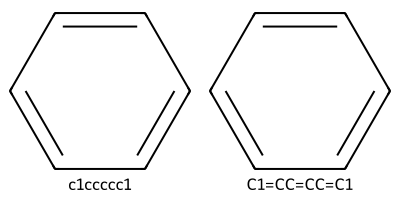

In [79]:
# Aromatic SMILES と Kekulé SMILESの比較

benzen = 'c1ccccc1' # Aromatic SMILES
benzen_kekule = 'C1=CC=CC=C1' # Kekulé SMILES
mols = [Chem.MolFromSmiles(benzen), Chem.MolFromSmiles(benzen_kekule)] # モルオブジェクトの生成
Draw.MolsToGridImage(mols, legends=[benzen, benzen_kekule], molsPerRow=len(mols)) # 構造の表示

In [77]:
# Kekulé SMILES の生成
mol = Chem.MolFromSmiles("c1ccccc1")
print("Aromatic SMILES: ", Chem.MolToSmiles(mol))
print("Kekulé SMILES: ", Chem.MolToSmiles(mol, kekuleSmiles=True)) # kekuleSmiles=True を指定するとKekulé SMILESに変換される

Aromatic SMILES:  c1ccccc1
Kekulé SMILES:  C1=CC=CC=C1


---

### 4.1.2 2次元表現

- 化合物の二次元表現 → **グラフによるコード化**
- 構造図はグラフとしてみなすことができる
  - 完全なコード化が可能
  - ノードは原子　エッジは結合　を表す
- グラフは **行例表現** と **結合表** で表される
  - 共に最初に原子を任意のラベル化
    - [Morgan(1965)が開発したアルゴリズム](https://doi.org/10.1021/c160017a018)が用いられている

#### 行列表現
行列の要素でグラフを定義
- 利点
  - 行列代数を用いた記述子計算に向いている
- 欠点
  - 要素数は原子数の2条で拡大
  - 立体化学などの情報は含まれない

準備

In [292]:
import numpy as np
import pandas as pd
from IPython.display import display

# 結合順位行列を取得する関数
def get_bond_order_matrix(mol: Chem.Mol) -> np.ndarray: 
    n_atoms = mol.GetNumAtoms() # 原子の数
    bond_order_matrix = np.zeros((n_atoms, n_atoms)) # 結合順位行列の初期化

    for bond in mol.GetBonds(): # 結合の取得
        i = bond.GetBeginAtomIdx() # 結合の始点の原子のindex
        j = bond.GetEndAtomIdx() # 結合の始点と終点の原子のindex
        order = bond.GetBondTypeAsDouble() # 結合順位の取得
        bond_order_matrix[i, j] = order # 結合順位行列の更新
        bond_order_matrix[j, i] = order  # 対称

    return bond_order_matrix

# 構造の表示
def display_mol(mol: Chem.Mol, draw_options: Draw.rdMolDraw2D.MolDrawOptions):
    display(Draw.MolToImage(mol, options=draw_options))
    
# 行列表示用
def smart_cast(value: float) -> str:
    if not value:
        return ' '
    if value.is_integer():
        return str(int(value))
    return str(float(value))

# 行列表示用
def display_df(df: pd.DataFrame):
    df = df.map(smart_cast, na_action='ignore')
    display(df)

draw_options = Draw.rdMolDraw2D.MolDrawOptions() # 描画オプションの設定
draw_options.addAtomIndices = True # 原子のindexを表示するように設定

例: アルデヒド　(好きな化合物に変えてもOK)

In [304]:
smiles = 'CC(=O)' # アルデヒド

まずは原子のindexを表示してみる　*教科書のとはindexが異なります

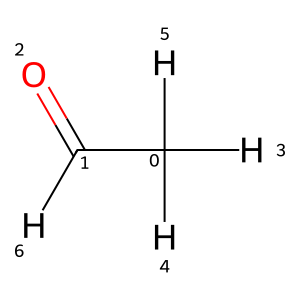

In [309]:
mol = Chem.MolFromSmiles(smiles) # モルオブジェクトの生成
mol = Chem.AddHs(mol) # 水素原子を追加
atom_names = [atom.GetSymbol() + str(atom.GetIdx()) for atom in mol.GetAtoms()] # 原子の名前のリスト
display_mol(mol, draw_options)

##### ①アルデヒドの結合（順位）行列

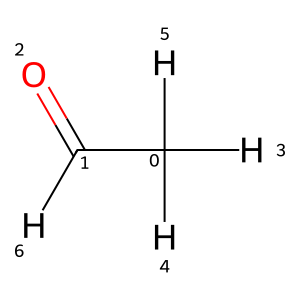

,C0,C1,O2,H3,H4,H5,H6
C0,,1,,1,1,1,
C1,1,,2,,,,1
O2,,2,,,,,
H3,1,,,,,,
H4,1,,,,,,
H5,1,,,,,,
H6,,1,,,,,


In [310]:
matrix = get_bond_order_matrix(mol) # 結合順位行列の取得
# 以下は表示用
df = pd.DataFrame(matrix, index=atom_names, columns=atom_names)
display(Draw.MolToImage(mol, options=draw_options))
display_df(df)

##### ②上半三角成分への圧縮

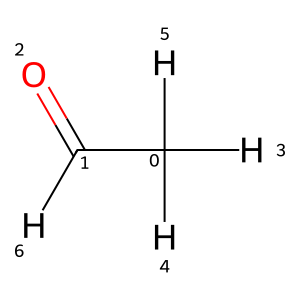

,C0,C1,O2,H3,H4,H5,H6
C0,,1,,1,1,1,
C1,,,2,,,,1
O2,,,,,,,
H3,,,,,,,
H4,,,,,,,
H5,,,,,,,
H6,,,,,,,


In [311]:
i_lower = np.tril_indices(matrix.shape[0], k=-1)
matrix[i_lower] = 0

# 以下は表示用
df = pd.DataFrame(matrix, index=atom_names, columns=atom_names)
display_mol(mol, draw_options)
display_df(df)

##### ③水素との結合の省略

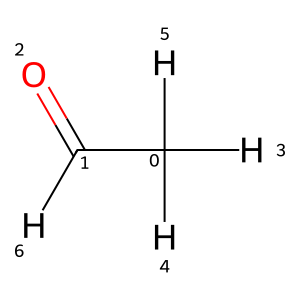

,C0,C1,O2
C0,,1,
C1,,,2
O2,,,


In [312]:
hydrogen_indices = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetAtomicNum() != 1] # 水素の原子以外
df_dropH = df.iloc[hydrogen_indices, :].iloc[:, hydrogen_indices] # 水素の行と列を削除
# 以下は表示用
display_mol(mol, draw_options)
display_df(df_dropH)

#### 結合表
原子の一覧表と結合の一覧表で定義

- 利点
  - 項目数が原子数に比例した増加で済む
  - 原子タイプ・結合次数を分離して記述できる
  - 自由電子・立体化学などの情報を追加できる

- **MOL形式** など代表的なファイル形式として用いられている
- **SD形式** MOL形式にデータ項目領域が追加されたもの (Structure Data File: SDFとも言われる)

#### MOL形式

In [320]:
# MOL形式の表示（教科書の例とは少し異なります）
mol = Chem.MolFromSmiles('CC(=O)')
print(Chem.MolToMolBlock(mol))


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



**MOL形式の構成**

``` plane text
RDKit          2D   # ヘッダー

  7  6  0  0  0  0  0  0  0  0999 V2000 # 原子数、結合数、電荷、多重度、コメント、バージョン
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0 # 左1~3列: x,y,z座標
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0 # 左4列目: 原子の種類
   -1.2990    0.7500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0 # 右5列目~: 原子の状態
    2.5981    1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.0490   -0.5490    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5490    2.0490    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0 # 原子1と原子2の結合は1重結合
  2  3  2  0 # 原子2と原子3の結合は2重結合
  1  4  1  0
  1  5  1  0
  1  6  1  0
  2  7  1  0
M  END
```

#### SD形式

In [322]:
from io import StringIO
from rdkit.Chem import SDWriter

# SD形式の表示
mol = Chem.MolFromSmiles('CC(=O)')

# SD系sh機ではデータ項目領域が追加できる
mol.SetProp('SMILES', Chem.MolToSmiles(mol)) # SMILESを設定
mol.SetProp('InChI', Chem.MolToInchi(mol)) # InChIを設定

sdf_io = StringIO()
writer = SDWriter(sdf_io)
writer.write(mol)
writer.flush()
sdf_string = sdf_io.getvalue()
sdf_io.close()

print(sdf_string)


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END
>  <SMILES>  (1) 
c1ccccc1

>  <InChI>  (1) 
InChI=1S/C6H6/c1-2-4-6-5-3-1/h1-6H

$$$$



---

### 4.1.3　立体構造

#### 化合物の立体構造と多重配座探索の重要性

* **立体構造の理解は不可欠**
  * ドラッグデザイン、化学反応の理解、分子間相互作用の解析において、化合物の立体構造の把握は重要である。

* **多重配座の存在**
  * 化合物は、結合の回転や柔軟性により複数の立体配座（コンフォマー）をとりうる。
  * 同一の分子式であっても異なる立体構造をとる異性体の存在を意味する。

* **配座の重要性**
  * 薬物と標的分子の結合（**ドッキング**）や、**活性配座**（実際に生物活性を示す構造）の同定などにおいて、**配座情報は重要**である。
  * 応用例
    * ファルマコフォアモデリング
    * 3D構造活性相関（3D-QSAR）
    * 立体構造ベースの分子検索

* **構造生成法**
  * **Rule and Data-based法**
    * 既知の結合長・結合角や安定構造（例：シクロヘキサンの椅子型構造）といった**化学的知識に基づいて初期構造を構築**する。
  * **Systematic法（グリッドサーチ）**
    * 回転可能な二面角を**段階的に変化させて全体の配座を構築**する。
    * トランス・ゴーシュなどの代表角を活用して探索空間を効率化。

#### RDKitで3次元構造を発生させてみよう

In [1]:
import os
import py3Dmol
from rdkit import Chem
from rdkit.Chem import Draw, rdDistGeom, rdMolAlign, AllChem, rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole

# 3D構造の表示用
def drawit(m, cids=[-1], p=None, removeHs=True,
            colors=('cyanCarbon','redCarbon','blueCarbon','magentaCarbon','whiteCarbon','purpleCarbon')):
        if removeHs:
            m = Chem.RemoveHs(m)
        if p is None:
            p = py3Dmol.view(width=400, height=400)
        p.removeAllModels()
        for i,cid in enumerate(cids):
            IPythonConsole.addMolToView(m,p,confId=cid)
        for i,cid in enumerate(cids):
            p.setStyle({'model':i,},{'stick':{'colorscheme':colors[i%len(colors)]}})
        p.zoomTo()
        return p.show()
    
def show_compare_mols(pred, ref,
                pred_cid:int=-1,
                ref_cid:int=-1,
                p=None,
                ):
    if p is None:
        p = py3Dmol.view(width=400, height=400)
    p.removeAllModels()
    IPythonConsole.addMolToView(pred, p, confId=pred_cid)
    IPythonConsole.addMolToView(ref, p, confId=ref_cid)
    p.setStyle({'model':0},{'stick':{'colorscheme': 'magentaCarbon'}}) # ref: magenta
    p.setStyle({'model':1},{'stick':{'colorscheme': 'cyanCarbon'}}) # pred: cyan
    p.zoomTo()
    return p.show()
    

例: Lipitor(Atorvastatin)
- PubChem CID: [60823](https://pubchem.ncbi.nlm.nih.gov/compound/60823)
- ChEMBL: [CHEMBL1487](https://www.ebi.ac.uk/chembl/explore/compound/CHEMBL1487)
- SMILES: `CC(C)C1=C(C(=C(N1CC[C@H](C[C@H](CC(=O)O)O)O)C2=CC=C(C=C2)F)C3=CC=CC=C3)C(=O)NC4=CC=CC=C4`

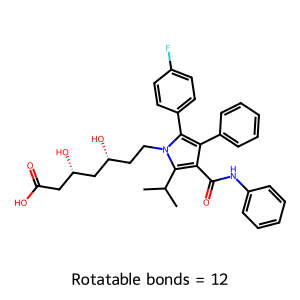

In [2]:
mol = Chem.MolFromSmiles('CC(C)C1=C(C(=C(N1CC[C@H](C[C@H](CC(=O)O)O)O)C2=CC=C(C=C2)F)C3=CC=CC=C3)C(=O)NC4=CC=CC=C4')
rb = rdMolDescriptors.CalcNumRotatableBonds(mol) # 回転可能な結合の数（教科書では13となっているが…）
Draw.MolToImage(mol, legend=f'Rotatable bonds = {rb}')

#### RDKitのコンフォーマー: ETKDG (Experimental Torsion Knowledge Distance Geometry)
- 論文
  - ETKDG: [https://pubs.acs.org/doi/10.1021/acs.jcim.5b00654](https://pubs.acs.org/doi/10.1021/acs.jcim.5b00654)
  - ETKDGv3: [https://pubs.acs.org/doi/10.1021/acs.jcim.0c00025](https://pubs.acs.org/doi/10.1021/acs.jcim.0c00025)
- **DG：Distance Geometry（距離幾何法）**
  - 全ての**原子対の距離の上下限を決めた距離行列**を元にして、ランダムな構造生成を行う古典的な方法
  - 非常に高速だが、芳香環のゆがみや不自然な二面角が生じやすい。
- **K：Knowledge-based constraints（知識ベースの拘束）**
  - 以下のような化学的に明らかな構造拘束を追加：
    - 芳香環を平面に保つ
    - 三重結合まわりの角度を180°に固定（直線状）
    - sp²原子の非平面化を防止（反転抑制）
- **ET：Experimental-Torsion（二面角）**
  - ケンブリッジ結晶構造データベース（CSD）から得られた**実験的二面角分布**を用いて、分子の1,4結合（torsion）の角度を統計的に好まれる値に制限
  - 二面角のSMARTSパターンごとにトーションポテンシャル関数（cos関数ベース）を適合させて使用

> ETKDGはAlphaFold3の化合物の参照座標生成にも使われている

In [3]:
mol_h = Chem.AddHs(mol) # 水素原子を追加
ps = rdDistGeom.ETKDGv3() # ETKDGv3はEmbedParametersとして扱われる
ps.randomSeed = 42 # 乱数のシードを設定
ps.numThreads = 10 # スレッド数を設定

cids = rdDistGeom.EmbedMultipleConfs(mol_h, numConfs=300, params=ps) # 300個のコンフォーマーを生成
len(cids)
mol_3d = Chem.RemoveHs(mol_h) # 解析用に水素原子を除去

In [4]:
rdMolAlign.AlignMolConformers(mol_3d) # 先頭のconformerを基準に揃えてAlign
drawit(mol_3d,cids[:20]) # 20個のconformerを表示

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

#### よくやるパターン: 立体構造を距離(RMSD)行列でクラスタリングして代表構造を抽出

In [5]:
from rdkit.ML.Cluster import Butina

# 対称性を考慮しない場合
# dists = AllChem.GetConformerRMSMatrix(mol_3d) 

# 対称性を考慮する場合
dists = []
for i in range(len(cids)):
    for j in range(i):
        dists.append(rdMolAlign.GetBestRMS(mol_3d, mol_3d, i, j))

clusts = Butina.ClusterData(dists, len(cids), 1.5, isDistData=True, reordering=True)
print("全クラスター数:", len(clusts))
for i, cl in enumerate(clusts, start=1):
    print(f"クラスター{i}のサイズ:", len(cl))


全クラスター数: 6
クラスター1のサイズ: 206
クラスター2のサイズ: 46
クラスター3のサイズ: 25
クラスター4のサイズ: 19
クラスター5のサイズ: 3
クラスター6のサイズ: 1


##### クラスターごとの構造を可視化
官能機の構造の違いが見たいので中心となるような構造を決めて、その構造に対してアライメントする方が視覚的に見やすくなる。

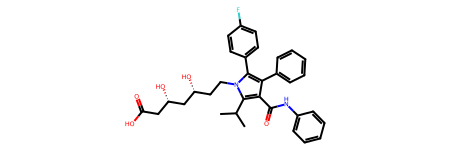

In [6]:
mol # 構造の再確認

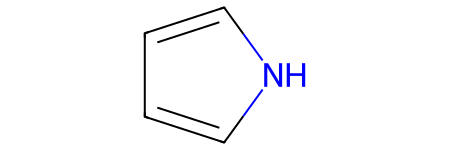

In [7]:
# アライメント用にコアを指定
core = Chem.MolFromSmiles('N1C=CC=C1') # ピロール環をコアに指定
core

In [8]:
# アライメント
rdMolAlign.AlignMolConformers(
    mol_3d,
    atomIds=mol_3d.GetSubstructMatch(core) # ピロール環をコアに指定してアライメント
)
centroids = [x[0] for x in clusts] # セントロイドを取得
colors = ('cyanCarbon','redCarbon','blueCarbon','magentaCarbon','whiteCarbon','purpleCarbon')
drawit(mol_3d,centroids,colors=colors) # セントロイドを表示

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

---
#### おまけ: 実際の実験構造と生成構造を比較してみよう

In [9]:
# ref PDB
s = Chem.SDMolSupplier("../117.sdf")
ref = s[0]
drawit(ref)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
# 構造のalignとRMSDの計算
rmsd = []
for i in range(len(cids)):
    rmsd.append(rdMolAlign.GetBestRMS(
        prbMol=mol_3d,
        refMol=ref,
        prbId=i,
    ))
print("min RMSD:", min(rmsd))
print("min RMSD index:", rmsd.index(min(rmsd)))

min RMSD: 0.8544970205881945
min RMSD index: 142


In [11]:
# 最小RMSDのconformerとrefの比較
show_compare_mols(mol_3d, ref, pred_cid=rmsd.index(min(rmsd)), ref_cid=0)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [12]:
for i, cl in enumerate(clusts):
    if rmsd.index(min(rmsd)) in cl:
        print("最小RMSDのconformerはクラスター", i, "に含まれています")
        break

最小RMSDのconformerはクラスター 2 に含まれています


## 4.2 類似性検索

#### Similar property principle: 
> M. A. Johnson and G. M. Maggiora, Concepts and applications of molecular similarity. Newy York: Wiley-Interscience, 1990.

**構造似ている化合物 → 同じ機能/活性を持っている可能性が高い** <br> そのため、類似性検索はLBDDにおいてとても重要

* 活性を持つ既知化合物に「構造的に似ている」化合物をデータベースから探索。
* 類似度に基づいて候補化合物をランク付け → 活性予測やスクリーニングに利用。
* 分子構造は事前に**フィンガープリント**としてコード化される。

### 4.2.1 フィンガープリントによる類似性検索

#### フィンガープリントとは？

* 分子構造を **ビット(0/1)列 (ベクトル)** で表現。
  * 1: 特定の部分構造が存在する
  * 0: 存在しない
* 主に**2次元構造**をベースに計算。
  * 三次元もあるよ（意外とイマイチ）
    * 例: [E3FP](https://github.com/keiserlab/e3fp)

#### 類似性の定量化

* 類似度の指標として **Tanimoto係数: $T_c$** を使用：

$$T_{c} = \frac{A \cap B}{A \cup B} = \frac{c}{a + b - c}$$

* $a, b$: 分子A・Bのビット数
* $c$: 両者で共通するビット数

* 値の解釈（1に近いほど類似性が高い）：
  * 1.0：ほぼ一致
  * 0.8程度：人間の目でも類似していると認識できる
  * この閾値の設定はかなり難しい
  * 多くの場合 0.85 あたりが指定されるが…

---

##### The 0.85 Myth
> Tripos社の研究者による先駆的な研究では、社内で使用していたフィンガープリントと活性化合物のデータセットを用いて、Tanimoto係数（Tc）が0.85以上であれば、2つの化合物が同じ生物活性を持つ可能性が高いことが示されました。
この数値は、その後15年以上にわたり、生物活性の一般的な目安として文献で広く引用され、多くの実践的な用途にも利用されてきました。
<br>しかしこの「Tc = 0.85」という基準は、分子の表現方法や類似度の計算手法が異なる場合には、必ずしも信頼できるものではありません。類似性の評価結果や「neighborhood behavior」は、使用する分子表現や類似度指標に大きく左右されるためです。
<br>このような事実はよく知られているものの、創薬化学の分野ではいまだに十分に認識されていないことが多いのが現状です。生物活性の有無をTc値の「閾値」で安易に判断する例が後を絶たないのは、類似性計算に対する理解不足によるものと考えられます。

[G. Maggiora, M. Vogt, D. Stumpfe, and J. Bajorath, “Molecular similarity in medicinal chemistry,” J. Med. Chem., vol. 57, no. 8, pp. 3186–3204, Apr. 2014.](https://pubs.acs.org/doi/10.1021/jm401411z) より翻訳して引用

---

#### 主なフィンガープリントの種類

| 名称           | 特徴                     |
| ------------ | ---------------------- |
| **MACCS**    | 定義済みの部分構造セット（166ビット）   |
| **Daylight** | 経路ベースの部分構造をハッシュ化       |
| **ECFP**     | 拡張円環フィンガープリント（例：ECFP4） |

#### 類似性検索の応用

* 誘導体探索、構造活性相関（SAR）、活性予測 など。
* 大規模DB（例：**PubChem**, **ChEMBL**）との連携により応用拡大。
* **MMPs（Matched Molecular Pairs）** による部分構造差異と活性の関連分析も注目。

In [6]:
from rdkit import Chem
from rdkit.Chem import Draw

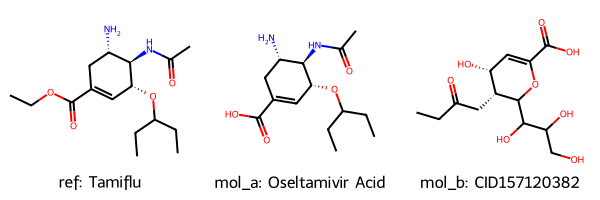

In [7]:
ref = Chem.MolFromSmiles("CCC(CC)O[C@@H]1C=C(C[C@@H]([C@H]1NC(=O)C)N)C(=O)OCC")
mol_a = Chem.MolFromSmiles("CCC(CC)O[C@@H]1C=C(C[C@@H]([C@H]1NC(=O)C)N)C(=O)O")
mol_b = Chem.MolFromSmiles("CCC(=O)C[C@@H]1[C@@H](C=C(OC1C(C(CO)O)O)C(=O)O)O")
img = Draw.MolsToGridImage([ref, mol_a, mol_b], legends=["ref: Tamiflu", "mol_a: Oseltamivir Acid", "mol_b: CID157120382"])
display(img)

#### MACCSKeys Fingerprint

[11:36:05] SMARTS Parse Error: syntax error while parsing: ?
[11:36:05] SMARTS Parse Error: Failed parsing SMARTS '?' for input: '?'
[11:36:05] SMARTS Parse Error: syntax error while parsing: ?
[11:36:05] SMARTS Parse Error: Failed parsing SMARTS '?' for input: '?'
[11:36:05] SMARTS Parse Error: syntax error while parsing: ?
[11:36:05] SMARTS Parse Error: Failed parsing SMARTS '?' for input: '?'


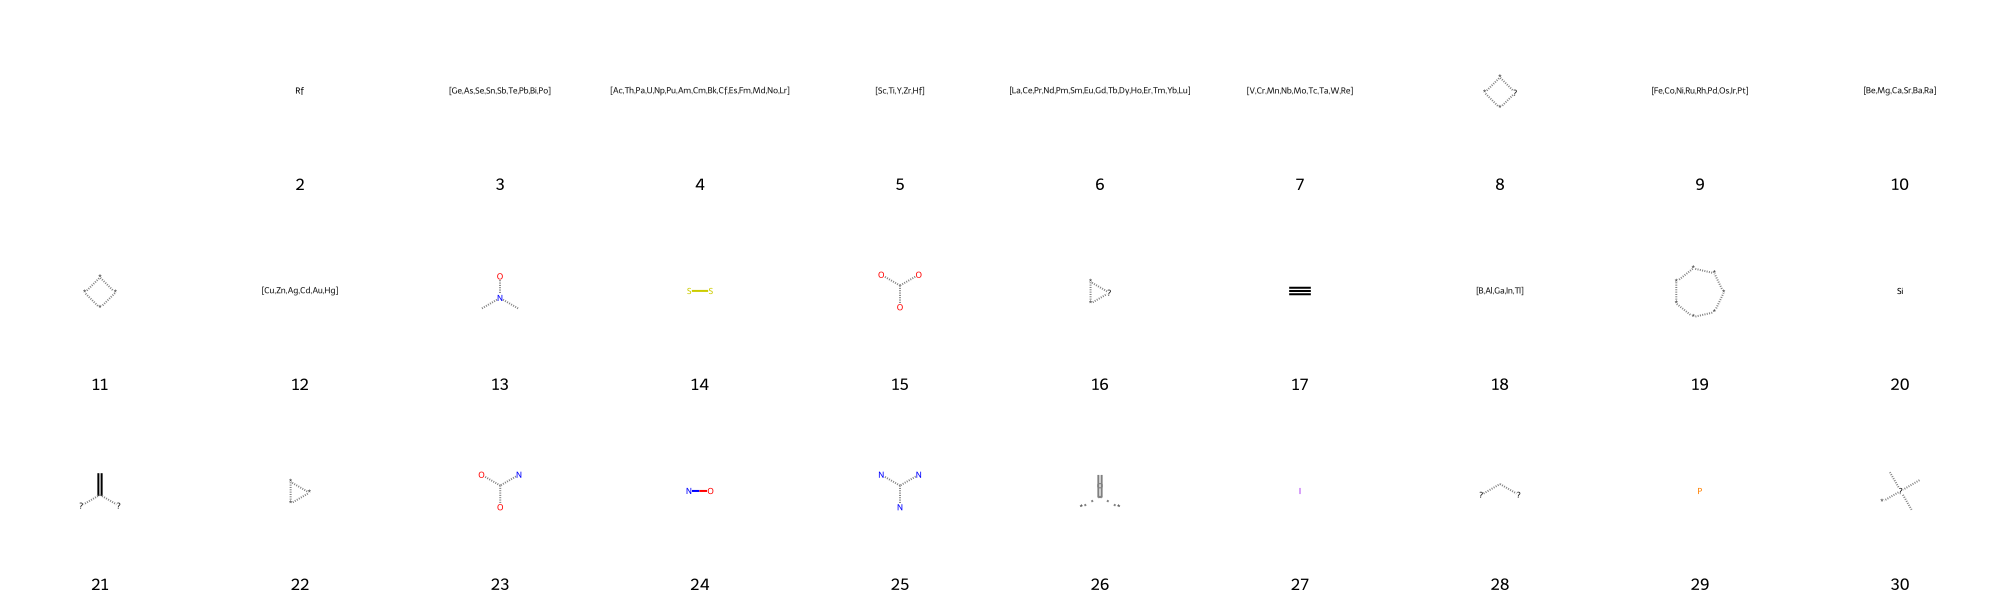

In [8]:
# 定義済みの部分構造セット（166ビット）
from rdkit.Chem import Draw, MACCSkeys
mols = [Chem.MolFromSmarts(smarts) for smarts, _ in MACCSkeys.smartsPatts.values()]
labels = list(map(str, MACCSkeys.smartsPatts.keys()))
Draw.MolsToGridImage(mols[:30], molsPerRow=10, maxMols=30, legends=labels[:30])

In [9]:
# MACCSフィンガープリントの計算
from rdkit.Chem.rdMolDescriptors import GetMACCSKeysFingerprint 
fp_ref = GetMACCSKeysFingerprint(ref)
fp_a = GetMACCSKeysFingerprint(mol_a)
fp_b = GetMACCSKeysFingerprint(mol_b)

print("MACCS FP:", fp_ref.ToBitString())
print("Length:", len(fp_ref)) # 先頭に予約ビットがあるため、166ではなく167になる (参考: https://github.com/rdkit/rdkit/issues/1726)
print("On bits:", fp_ref.GetNumOnBits())

MACCS FP: 00000000000000000000000000000000000000000000000000100010000000000000000000001001000010000010100101010000100001110010110000010011100111001000111100100111111111111101110
Length: 167
On bits: 46


In [10]:
import numpy as np
# スクラッチ
def tanimoto(fp1, fp2):
    c = np.dot(fp1, fp2) # 共通ビット数
    a = sum(fp1) # 分子Aのビット数 np.dot(fp1, fp1) や fp1.GetNumOnBits() でもOK
    b = sum(fp2) # 分子Bのビット数
    return c / (a + b - c)

print(f"Tamiflu - Oseltamivir Acid:\tTc={tanimoto(fp_ref, fp_a):.3f} (MACCS)")
print(f"Tamiflu - CID157120382: \tTc={tanimoto(fp_ref, fp_b):.3f} (MACCS)")

# DataStructs （こっちのが速い）
# from rdkit.Chem import DataStructs
# print(DataStructs.TanimotoSimilarity(fp_ref, fp_a)) 

Tamiflu - Oseltamivir Acid:	Tc=0.915 (MACCS)
Tamiflu - CID157120382: 	Tc=0.491 (MACCS)


---

#### その他の Fingerprint と Similarity

##### RDKitで扱える Fingerprint の一例

| # | 名称                         | 特徴・備考                                                                                                                 |
| - | -------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| 1 | **MACCS Keys**             | 166ビットのSMARTSベースの部分構造フィンガープリント。広く使用される標準的な記述子。                                                                        |
| 2 | **ECFP4**                  | Extended-Connectivity Fingerprint。Morganフィンガープリントの一種で、半径2（ECFP4）を使用し、原子の構造に基づく特徴を捉える。                                 |
| 3 | **FCFP4**                  | Functional-Class Fingerprint。ECFPと同様だが、原子の機能的な分類（例：芳香族、酸素、窒素など）に基づいて特徴を捉える。                                           |
| 4 | **RDKit Fingerprint**      | トポロジカルパスベースのフィンガープリント。Daylight風のアルゴリズムに基づく。                                                      |
| 5 | **Atom Pair**              | 原子対の距離（結合数）と原子タイプに基づくフィンガープリント。分子内の全ての原子対を考慮する。                                                                       |
| 6 | **Topological Torsion**    | 4原子からなる連続したパス（torsion）に基づくフィンガープリント。分子のトポロジーに関する情報を捉える。                                                               |
| 7 | **Gobbi 2D Pharmacophore** | Gobbiの2Dファーマコフォア記述子。薬理学的特徴（例：Hドナー、アクセプター、芳香族など）とその距離に基づく。|
| 8 | **Avalon**                 | Avalonツールキットによるフィンガープリント。部分構造や類似性に基づく記述子で、公開されている。                                                                    |

##### RDKitで扱える Similarity の一例


| #  | 類似度名               | 数式                                                                                   | 備考                              |
| -- | ------------------ | ------------------------------------------------------------------------------------ | ------------------------------- |
| 1  | **Tanimoto**       | $\frac{\|A \cap B\|}{\|A\| + \|B\| - \|A \cap B\|}$                                  | 一般的な係数。交差 ÷ 和集合                 |
| 2  | **Dice**           | $\frac{2 \|A \cap B\|}{\|A\| + \|B\|}$                                               | Dice係数。重なりが強調される                |
| 3  | **Cosine**         | $\frac{\|A \cap B\|}{\sqrt{\|A\| \cdot \|B\|}}$                                      | コサイン類似度（角度ベース）                  |
| 4  | **Asymmetric**     | $\frac{\|A \cap B\|}{\min(\|A\|,\|B\|)}$                                             | 小さい方との一致度                       |
| 5  | **Braun-Blanquet** | $\frac{\|A \cap B\|}{\max(\|A\|,\|B\|)}$                                             | 大きい方への包含度                       |
| 6  | **Kulczynski**     | $\frac{\|A \cap B\|(\|A\| + \|B\|)}{2 \|A\| \|B\|}$                                  | 平均包含率                           |
| 7  | **McConnaughey**   | $\frac{\|A \cap B\|(\|A\| + \|B\|) - \|A\| \|B\|}{\|A\| \|B\|}$                      | 負の値を取ることもある                     |
| 8  | **Sokal**          | $\frac{\|A \cap B\|}{2\|A\| + 2\|B\| - 3\|A \cap B\|}$                               | 非一致へのペナルティが強め                   |
| 9  | **Russel-Rao**     | $\frac{\|A \cap B\|}{\|A\|}$                                                         | A に対する包含度                       |
| 10 | **Rogot-Goldberg** | $\frac{\|A \cap B\|}{\|A\|}$                                                         | 式はRusselと同じだが意味が異なる場合あり         |
| 11 | **OnBit**          | $\frac{\|A \cap B\|}{\|A \cup B\|}$                                                  | Tanimotoと同義（別名）                 |
| 12 | **AllBit**         | $\frac{\|A\| - \|A \oplus B\|}{\|A\|}$                                               | Hamming距離ベース                    |
| 13 | **Tversky**        | $\frac{\|A \cap B\|}{\alpha \|A\| + \beta \|B\| + (1 - \alpha - \beta)\|A \cap B\|}$ | α=β=1 → Tanimoto、α=β=0.5 → Dice |


In [120]:
from rdkit.Chem import DataStructs, PatternFingerprint
from rdkit.Chem import rdFingerprintGenerator as fpgen
from rdkit.Chem.rdMolDescriptors import GetMACCSKeysFingerprint
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate
from rdkit.Avalon import pyAvalonTools

def Gobbi2D_bits(mol,fpLen=1024):
    res = DataStructs.ExplicitBitVect(fpLen)
    for bit in Generate.Gen2DFingerprint(mol,Gobbi_Pharm2D.factory).GetOnBits():
        # the bits are not hashed, so we need to do so before we fold them:
        res.SetBit(hash((bit,))%fpLen)
    return res

mgen = fpgen.GetMorganGenerator(radius=2, fpSize=1024)
mfgen = fpgen.GetMorganGenerator(radius=2, fpSize=1024, atomInvariantsGenerator=fpgen.GetMorganAtomInvGen())
rgen = fpgen.GetRDKitFPGenerator(maxPath=7, fpSize=1024)
apgen = fpgen.GetAtomPairGenerator(fpSize=1024)
ttgen = fpgen.GetTopologicalTorsionGenerator(fpSize=1024)

fp_names = [
    "MACCS",
    "ECFP4",
    "FCFP4",
    "RDKit",
    "AtomPair",
    "TopologicalTorsion",
    "2D Pharmacophore",
    "Avalon",
]

def get_fingerprints(mol, fp_size=1024):
    return [
        GetMACCSKeysFingerprint(mol),
        mgen.GetFingerprint(mol),
        mfgen.GetFingerprint(mol),
        rgen.GetFingerprint(mol),
        apgen.GetFingerprint(mol),
        ttgen.GetFingerprint(mol),
        Gobbi2D_bits(mol, fp_size),
        pyAvalonTools.GetAvalonFP(mol),
    ]
    
sim_methods = [
    "Tanimoto",
    "Dice",
    "Cosine",
    "Asymmetric",
    "BraunBlanquet",
    "Kulczynski",
    "McConnaughey",
    "Sokal",
    "Russel",
    "RogotGoldberg",
    "OnBit",
    "AllBit",
    "Tversky a=0.7, b=0.3",
    "Tversky a=0.3, b=0.7",
]

In [123]:
import pandas as pd

fps = get_fingerprints(ref)
fps_mol = get_fingerprints(mol_a)

sims = []
for fp1, fp2 in zip(fps, fps_mol):
    sims.append(
        [
            DataStructs.TanimotoSimilarity(fp1, fp2),
            DataStructs.DiceSimilarity(fp1, fp2),
            DataStructs.CosineSimilarity(fp1, fp2),
            DataStructs.AsymmetricSimilarity(fp1, fp2),
            DataStructs.BraunBlanquetSimilarity(fp1, fp2),
            DataStructs.KulczynskiSimilarity(fp1, fp2),
            DataStructs.McConnaugheySimilarity(fp1, fp2),
            DataStructs.SokalSimilarity(fp1, fp2),
            DataStructs.RusselSimilarity(fp1, fp2),
            DataStructs.RogotGoldbergSimilarity(fp1, fp2),
            DataStructs.OnBitSimilarity(fp1, fp2),
            DataStructs.AllBitSimilarity(fp1, fp2),
            DataStructs.TverskySimilarity(fp1, fp2, 0.7, 0.3),
            DataStructs.TverskySimilarity(fp1, fp2, 0.3, 0.7),
        ]
    )

df = pd.DataFrame(sims, index=fp_names, columns=sim_methods)
display(df)
display(df.describe().drop('count'))

,Tanimoto,Dice,Cosine,Asymmetric,BraunBlanquet,Kulczynski,McConnaughey,Sokal,Russel,RogotGoldberg,OnBit,AllBit,"Tversky a=0.7, b=0.3","Tversky a=0.3, b=0.7"
MACCS,0.914894,0.955556,0.955792,0.977273,0.934783,0.956028,0.912055,0.843137,0.257485,0.969581,0.914894,0.976048,0.947137,0.964126
ECFP4,0.782609,0.878049,0.878310,0.900000,0.857143,0.878571,0.757143,0.642857,0.035156,0.936481,0.782609,0.990234,0.869565,0.886700
FCFP4,0.790698,0.883117,0.883788,0.918919,0.850000,0.884459,0.768919,0.653846,0.033203,0.939275,0.790698,0.991211,0.869565,0.897098
RDKit,0.951411,0.975100,0.975403,1.000000,0.951411,0.975705,0.951411,0.907324,0.592773,0.968248,0.951411,0.969727,0.965484,0.984910
AtomPair,0.748718,0.856305,0.859002,0.929936,0.793478,0.861707,0.723415,0.598361,0.142578,0.913800,0.748718,0.952148,0.830017,0.884313
TopologicalTorsion,0.828571,0.906250,0.908025,0.966667,0.852941,0.909804,0.819608,0.707317,0.028320,0.951613,0.828571,0.994141,0.884146,0.929487
2D Pharmacophore,0.672365,0.804089,0.814830,0.959350,0.692082,0.825716,0.651432,0.506438,0.230469,0.862688,0.672365,0.887695,0.859745,0.755200
Avalon,0.875969,0.933884,0.934171,0.957627,0.911290,0.934459,0.868917,0.779310,0.220703,0.956712,0.875969,0.968750,0.943239,0.924714


,Tanimoto,Dice,Cosine,Asymmetric,BraunBlanquet,Kulczynski,McConnaughey,Sokal,Russel,RogotGoldberg,OnBit,AllBit,"Tversky a=0.7, b=0.3","Tversky a=0.3, b=0.7"
mean,0.820654,0.899044,0.901165,0.951221,0.855391,0.903306,0.806612,0.704824,0.192586,0.937300,0.820654,0.966244,0.896112,0.903318
std,0.091503,0.055782,0.053033,0.032785,0.083827,0.050358,0.100716,0.132461,0.187563,0.035265,0.091503,0.034765,0.049107,0.069808
min,0.672365,0.804089,0.814830,0.900000,0.692082,0.825716,0.651432,0.506438,0.028320,0.862688,0.672365,0.887695,0.830017,0.755200
25%,0.774136,0.872613,0.873483,0.927182,0.835870,0.874355,0.748711,0.631733,0.034668,0.930811,0.774136,0.964600,0.867110,0.886103
50%,0.809635,0.894683,0.895907,0.958488,0.855042,0.897132,0.794263,0.680582,0.181641,0.945444,0.809635,0.972887,0.876856,0.910906
75%,0.885700,0.939302,0.939576,0.969318,0.917163,0.939851,0.879702,0.795267,0.237223,0.959596,0.885700,0.990479,0.944213,0.938147
max,0.951411,0.975100,0.975403,1.000000,0.951411,0.975705,0.951411,0.907324,0.592773,0.969581,0.951411,0.994141,0.965484,0.984910


基本的には、
FP:`ECFP`か`RDKit` Similarity: `Tanimoto`
でOK

- `GetCountFingerprint`で Count Fingerprint も扱える。その場合、衝突を回避のために bit数は多めにする
- Hashed Fingerprintの衝突に関しては [RDKit Blog](https://greglandrum.github.io/rdkit-blog/posts/2023-01-23-colliding-bits-iii-expanded.html) が参考になる。
- `2048`にすることが多いが、上のBlog曰く、なるべく衝突を回避したいなら`4098`以上にする必要がある。
- しかし、機械学習等の特徴量としてFPを使う場合は、次元数の増加に伴うリスクもあるため、自身のモデルやタスクに合わせて要検証

---

#### おまけ: ECFP (Extended-Conectivity Fingerprints)のアルゴリズム

```text
1: Input: molecule, radius R, fingerprint length S
2: Initialize: fingerprint vector f ← 0^S
3: for each atom a in molecule
4:     rₐ ← g(a)     ⬅︎ 原子の特徴を参照する
5: for L = 1 to R        ⬅︎ 各層について繰り返す
6:     for each atom a in molecule
7:         r₁, ..., r_N = neighbors(a)
8:         v ← [rₐ, r₁, ..., r_N]     ⬅︎ 特徴量を連結する
9:         rₐ ← hash(v)              ⬅︎ ハッシュ関数で変換する
10:        i ← mod(rₐ, S)            ⬅︎ ハッシュ値をインデックスに変換する
11:        fᵢ ← 1                    ⬅︎ 指定されたインデックスのビットを1にする
12: Return: binary vector f
```

> [Convolutional Networks on Graphs for Learning Molecular Fingerprints](https://doi.org/10.48550/arXiv.1509.09292) を参考にして作成

In [5]:
import hashlib
import numpy as np
from rdkit import Chem

class ECFP:
    def __init__(self, radius=2, fp_size=1024):
        self.radius = radius
        self.fp_size = fp_size
        self.atom_reprs = {}

    def _hash(self, x: tuple) -> int:
        """ハッシュ関数（SHA-1ベース）"""
        s = str(x).encode('utf-8')
        return int(hashlib.sha1(s).hexdigest(), 16)

    def _get_atom_features(self, atom: Chem.Atom) -> tuple:
        """
        原子の特徴量をタプルで返す
        FingerprintUtil.cpp の getConnectivityInvariants と同じ特徴量（多分）
        https://github.com/rdkit/rdkit/blob/21d694e88aba4e4422048707f57627e1c88e5e49/Code/GraphMol/Fingerprints/FingerprintUtil.cpp#L244
        """
        return (
            atom.GetDegree(),                               # 結合する非水素原子数
            atom.GetTotalValence() - atom.GetTotalNumHs(),  # 原子価から水素数を引いた値
            atom.GetAtomicNum(),                            # 原子番号
            atom.GetMass(),                                 # 原子質量
            atom.GetFormalCharge(),                         # 原子の電荷
            atom.GetTotalNumHs(),                           # 結合する水素原子数
            atom.IsInRing(),                                # 少なくとも1つの環に含まれるか
        )
    
    def get_fingerprint(self, mol: Chem.Mol) -> np.ndarray:
        """
        ECFPアルゴリズム
        Args:
            mol: rdkitのMolオブジェクト
        Returns:
            fp: フィンガープリント
        """
        
        fp = np.zeros(self.fp_size, dtype=int)
        atoms = mol.GetAtoms()

        # 原子の特徴量を初期化
        self.atom_reprs = {a.GetIdx(): self._hash(self._get_atom_features(a)) for a in atoms}

        # 半径分繰り返す
        for _ in range(self.radius):
            new_reprs = {}
            for atom in atoms:
                idx = atom.GetIdx()
                
                # 隣接原子の特徴量を取得
                neighbor_reprs = sorted([self.atom_reprs[nei.GetIdx()] for nei in atom.GetNeighbors()]) # 隣接原子の特徴量を取得してソート
                combined = (self.atom_reprs[idx], *neighbor_reprs) # 注目原子の特徴量と隣接原子の特徴量を結合
                
                # ハッシュ化
                new_hash = self._hash(combined) # 結合した特徴量をハッシュ化
                new_reprs[idx] = new_hash # 新しい特徴量を保存
                
                # fpにbitを立てる
                fp[new_hash % self.fp_size] = 1 # mod(new_hash, fp_size) でハッシュ化した特徴量を元にbitを立てる

            # 新しい特徴量を更新
            self.atom_reprs = new_reprs

        return fp

In [7]:
display(img)
# scratch ECFP
ecfp4 = ECFP(radius=2, fp_size=1024)
fp_ref = ecfp4.get_fingerprint(ref)
fp_a = ecfp4.get_fingerprint(mol_a)
fp_b = ecfp4.get_fingerprint(mol_b)
print("***Scratch ECFP***")
print(f"Tamiflu - Oseltamivir Acid:\tTc={tanimoto(fp_ref, fp_a):.3f} (ECFP)")
print(f"Tamiflu - CID157120382: \tTc={tanimoto(fp_ref, fp_b):.3f} (ECFP)")

# rdkit ECFP
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit.Chem import DataStructs
mgen = GetMorganGenerator(radius=2, fpSize=1024)
fp_ref = mgen.GetFingerprint(ref)
fp_a = mgen.GetFingerprint(mol_a)
fp_b = mgen.GetFingerprint(mol_b)
print("\n***rdkit ECFP***")
print(f"Tamiflu - Oseltamivir Acid:\tTc={DataStructs.TanimotoSimilarity(fp_ref, fp_a):.3f} (ECFP)")
print(f"Tamiflu - CID157120382: \tTc={DataStructs.TanimotoSimilarity(fp_ref, fp_b):.3f} (ECFP)")

NameError: name 'ref' is not defined

Calculating similarities: 100%|██████████| 10000/10000 [01:30<00:00, 110.82it/s]


SpearmanR = 0.7373, p-value = 0


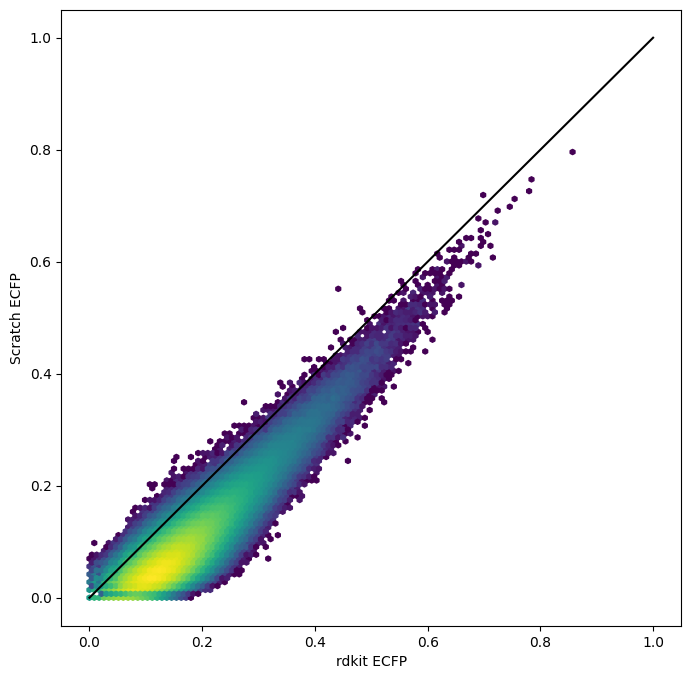

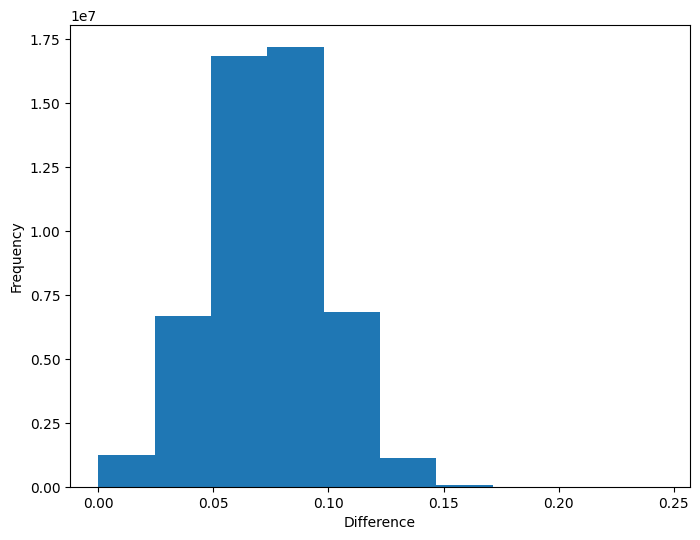

In [10]:
# Compare ECFP
import os
from pathlib import Path

from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

def read_smiles(file, size=1000):
    with open(file, "r") as f:
        return np.random.choice(f.readlines(), size=size, replace=False)

path = Path(os.path.expanduser("~"), "library_prepared")
paths = np.random.choice(list(path.glob("*.txt")), size=10, replace=False)
smiles = []
for file in tqdm(paths, desc="Reading smiles"):
    smiles.extend(read_smiles(file, size=1000))

mols = [Chem.MolFromSmiles(smi) for smi in tqdm(smiles, desc="Converting to mols")]

# scratch
ecfp4 = ECFP(radius=2, fp_size=2048)
fps = [DataStructs.CreateFromBitString(''.join(ecfp4.get_fingerprint(mol).astype(str))) for mol in tqdm(mols, desc="Calculating ECFP")]
sims = []
for i in tqdm(range(len(fps)), desc="Calculating similarities"):
    for j in range(i):
        sims.append(DataStructs.TanimotoSimilarity(fps[i], fps[j]))

# rdkit
mgen = GetMorganGenerator(radius=2, fpSize=2048)
fps = mgen.GetFingerprints(mols, numThreads=10)
sims_rdkit = []
for i in tqdm(range(len(fps)), desc="Calculating similarities"):
    for j in range(i):
        sims_rdkit.append(DataStructs.TanimotoSimilarity(fps[i], fps[j]))

rho, pval = spearmanr(sims_rdkit, sims)
print(f"SpearmanR = {rho:.4f}, p-value = {pval:.2g}")

plt.figure(figsize=(8, 8))
plt.plot((0,1),(0,1),'k-')
plt.hexbin(sims_rdkit, sims, bins='log')
plt.xlabel('rdkit ECFP')
plt.ylabel('Scratch ECFP')
plt.show()

diff = np.abs(np.array(sims_rdkit) - np.array(sims))
plt.figure(figsize=(8, 6))
plt.hist(diff)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

###  4.2.2 部分および上部構造検索

- フィンガープリントによる類似性検索 → 化合物間のビットサイズが同程度の際に正当な評価がされる
- サイズが異なるが**部分構造の共通性**を含む構造の検索
  - **部分構造**　(**Substructure**)　検索
    - クエリー化合物の物性や機能を予測・新規性の確認
  - **上部構造**　(**Superstructure**)　検索
    - 合成の際の構成素材(Buiding block)の確認
- アルゴリズム
  - グラフ化 →　**部分グラフ間の同形探索**
    - 全原子比較はNP完全問題
      - フィンガープリントによるプレスクリーニング
      - 高速アルゴリズムによる部分グラフの同形探索（バックトラック法アルゴリズム）
      - などの効率化の工夫

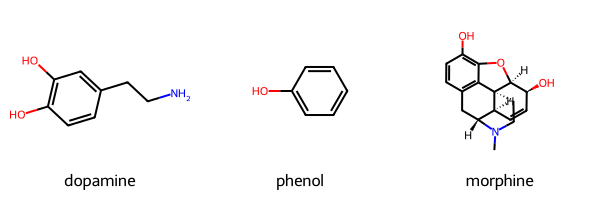

In [26]:
from rdkit import Chem
from rdkit.Chem import Draw
dopamine = Chem.MolFromSmiles("C1=CC(=C(C=C1CCN)O)O")
phenol = Chem.MolFromSmiles("C1=CC=C(C=C1)O")
morphine = Chem.MolFromSmiles("CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@H]3[C@H](C=C4)O")
Chem.rdCoordGen.AddCoords(morphine)
Draw.MolsToGridImage([dopamine, phenol, morphine], legends=["dopamine", "phenol", "morphine"])

In [59]:
def display_substruct_match(target:Chem.Mol, query:Chem.Mol):
    match_atoms = target.GetSubstructMatch(query)
    match_bonds = []
    for bond in query.GetBonds():
        match_bonds.append(
            target.GetBondBetweenAtoms(
                match_atoms[bond.GetBeginAtomIdx()],
                match_atoms[bond.GetEndAtomIdx()]
            ).GetIdx()
        )
    return Draw.MolToImage(target, highlightAtoms=match_atoms, highlightBonds=match_bonds)

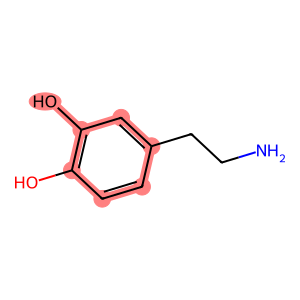

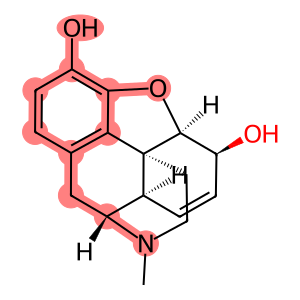

In [66]:
display(display_substruct_match(dopamine, phenol))
display(display_substruct_match(morphine, dopamine))

#### ライブラリから部分構造検索してみる

In [14]:
import time
import pandas as pd
from rdkit import RDLogger
from rdkit import Chem
from rdkit.Chem import rdSubstructLibrary, rdMolDescriptors
import chembl_downloader
import mols2grid
RDLogger.DisableLog("rdApp.*")

ChEMBL35からライブラリを作成（簡易版 10万化合物）

In [15]:
chembl_version="35"
mols = rdSubstructLibrary.CachedTrustedSmilesMolHolder() # 化合物を保存
fps = rdSubstructLibrary.TautomerPatternHolder(1024) # フィンガープリントによるプレスクリーニング
keys = rdSubstructLibrary.KeyFromPropHolder() # 化合物のIDを保存
library = rdSubstructLibrary.SubstructLibrary(mols,fps, keys) # ライブラリを作成

nats = []
with chembl_downloader.supplier(version=chembl_version) as suppl: # ChEMBL35から化合物を取得
    t1=time.time()
    for i,mol in enumerate(suppl):
        if not ((i+1)%10000):
            print(f"Processed {i+1} molecules in {(time.time()-t1):.1f} seconds")
        if mol is None or mol.GetNumAtoms()>75: # 化合物がNoneまたは原子数が75以上の場合はスキップ
            continue
        library.AddMol(mol) # ライブラリに化合物を追加
        nats.append(mol.GetNumHeavyAtoms())
        if len(library) >= 100000: # 全部行いたい場合はコメントアウト
            break # 全部行いたい場合はコメントアウト
t2=time.time()

order = [y for x, y in sorted([(x, i) for i, x in enumerate(nats)])]
print(f"That took {t2-t1:.2f} seconds. The library has {len(library)} molecules.")

Processed 10000 molecules in 8.0 seconds
Processed 20000 molecules in 14.9 seconds
Processed 30000 molecules in 22.0 seconds
Processed 40000 molecules in 28.9 seconds
Processed 50000 molecules in 35.9 seconds
Processed 60000 molecules in 42.8 seconds
Processed 70000 molecules in 49.8 seconds
Processed 80000 molecules in 56.7 seconds
Processed 90000 molecules in 63.7 seconds
Processed 100000 molecules in 70.9 seconds
That took 71.77 seconds. The library has 100000 molecules.


部分構造を用意

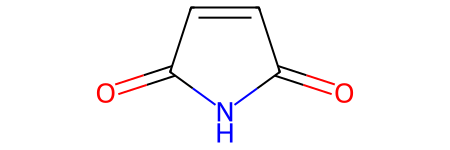

In [16]:
qry = Chem.MolFromSmiles("O=C1C=CC(=O)N1")
qry

In [17]:
library.SetSearchOrder(order) # ライブラリの化合物をソート
mids = library.GetMatches(qry, maxResults=library.CountMatches(qry)) # 部分構造を用いて検索
print(f'{len(mids)} results')

186 results


In [18]:
# 可視化
data = {
    "mol": [library.GetMolHolder().GetMol(x) for x in mids],
    "ID": [library.GetKeyHolder().GetKey(x) for x in mids],
    "MW": [rdMolDescriptors.CalcExactMolWt(library.GetMolHolder().GetMol(x)) for x in mids],
}
mols2grid.display(
    pd.DataFrame(data),
    mol_col="mol",
    subset=['ID', 'img', 'MW'],
    transform={
        "MW": lambda x: round(x, 2),
    },
    size=(200,200),
)

MolGridWidget()

他にも条件を調整したりなどができる詳しくは以下の RDKit Blog を参考に
>[More on generalized substructure search
](https://greglandrum.github.io/rdkit-blog/posts/2025-02-08-more-on-generalized-substructure-search.html)

---



#### 最近の傾向

扱う化合物の数が大規模になっているため、
$$精度 < 計算速度$$
の傾向にある。

例:
- [iSIM (instant similarity)](https://github.com/mqcomplab/iSIM)

また、Fingerprintベース以外の手法も注目されている
<br>例:
- MCES (Maximum Common Edge Subgraph)
  - [RascalMCES](https://greglandrum.github.io/rdkit-blog/posts/2023-11-08-introducingrascalmces.html)
  - [myopic MCES](https://github.com/AlBi-HHU/myopic-mces)
- Synthon Based Search
  - [Synthon (wiki)](https://ja.wikipedia.org/wiki/%E3%82%B7%E3%83%B3%E3%83%88%E3%83%B3)
  - 実際に合成可能な断片（Synthon）に基づいた検索
  - [Introducing Synthon Searching](https://greglandrum.github.io/rdkit-blog/posts/2024-12-03-introducing-synthon-search.html)

---

## 4.2 ファルマコフォア
### ファルマコフォア（Pharmacophore）

* **定義**：薬効発現に必要な物理化学的・立体的特徴を**抽象化**したモデル。
* **用途**：分子内の重要な相互作用パターンを捉え、類似物探索や活性化合物の特定に利用。
* **代表的特徴（Feature）**：

  * 水素結合供与体（Don）、受容体（Acc）
  * カチオン（Cat）、アニオン（Ani）
  * 芳香族（Aro）、疎水性（Hyd）


### 4.3.1 ファルマコフォアの表現方法

* **形式**：各特徴は3D空間上の「Feature球」で表現。
* **応用**：

  * タンパク質共結晶構造からの情報抽出
  * 活性化合物群の重ね合わせ
* **検索**：LBDD（Ligand-Based Drug Design）で活用され、Lead/Scaffold hoppingにも有効。

### 4.3.2 ファルマコフォアモデリング

### 作成方法

| 方法        | 概要               | 利点                    |
| --------- | ---------------- | --------------------- |
| ① リガンドベース | 複数の活性化合物から構築     | 構造未知標的に有効             |
| ② 構造ベース   | 共結晶構造やドッキング結果を利用 | 精度が高く、構造データの活用が進む近年有効 |

* **注意点**：

  * 多重配座生成が必要（特に①）
  * ドッキングでの補完も可能（②）

### 検証

* **目的**：モデルの妥当性確認
* **指標**：濃縮係数（Enrichment Factor）、ROC曲線などを使用

### 4.3.3 ファルマコフォア検索

* **検索準備**：

  1. 化合物を多重配座化
  2. 検索条件の設定

* **検索条件**：

  * **Feature Key**：必須特徴（検索で一致が必須）
  * 一致条件：

    * 球の半径
    * 距離範囲
    * 最小一致数、完全一致数

* **工夫**：

  * 不活性化合物や受容体構造を使った排除・包含条件の設定で偽陽性を抑制
  * 検索と条件調整を繰り返して最適化


In [4]:
from rdkit import Chem, RDConfig
from rdkit.Chem import ChemicalFeatures, Draw
from rdkit.Chem.Pharm3D import Pharmacophore, EmbedLib
import os
import pandas as pd
import py3Dmol
from rdkit.Chem.Draw import IPythonConsole

from xml.etree import ElementTree as ET
from collections import defaultdict
from matplotlib import colormaps as cm
from matplotlib.colors import to_hex

def drawit(m, cid=-1, p=None, removeHs=True):
    if removeHs:
        m = Chem.RemoveHs(m)
    if p is None:
        p = py3Dmol.view(width=400, height=400)
    p.removeAllModels()
    IPythonConsole.addMolToView(m,p,confId=cid)
    p.zoomTo()
    return p.show()

def drawit_addpharmc(m, feats, cid=-1, p=None, removeHs=True, family2color=None):
    if removeHs:
        m = Chem.RemoveHs(m)
    if p is None:
        p = py3Dmol.view(width=400, height=400)
    if family2color is None:
        cmap = cm.get_cmap('tab20')
        palette = [to_hex(cmap(i)[:3]) for i in range(cmap.N)]
        families = set([feat.GetFamily() for feat in feats])
        family2color = {t: palette[i] for i, t in enumerate(families)}
    
    p.removeAllModels()
    IPythonConsole.addMolToView(m,p,confId=cid)
    for feat in feats:
        pos = feat.GetPos()
        p.addSphere({'center': {'x': pos.x, 'y': pos.y, 'z': pos.z}, 'radius': 0.5, 'color': family2color[feat.GetFamily()]})
    p.zoomTo()
    return p.show()

def save_pcophore_as_cmm(feats, filename="pharmacophore.cmm", type2color=None):
    types = set([feat.GetType() for feat in feats])
    if type2color is None:
        cmap = cm.get_cmap('tab20')
        palette = [cmap(i)[:3] for i in range(cmap.N)]
        type2color = {t: palette[i] for i, t in enumerate(types)}
    
    root = ET.Element("marker_sets")
    class_markers = defaultdict(list)
    all_positions = []
    marker_id = 1

    marker_id_map = {}  # position idx -> marker id

    for feat in feats:
        pos = feat.GetPos()
        type_ = feat.GetType()
        color = type2color[type_]

        attribs = {
            "id": str(marker_id),
            "x": f"{pos.x:.3f}",
            "y": f"{pos.y:.3f}",
            "z": f"{pos.z:.3f}",
            "r": str(color[0]),
            "g": str(color[1]),
            "b": str(color[2]),
            "radius": "0.5",
            "note": type_
        }

        marker_id_map[len(all_positions) - 1] = marker_id
        class_markers[type_].append(ET.Element("marker", attrib=attribs))
        marker_id += 1

    for type_, markers in class_markers.items():
        mset = ET.SubElement(root, "marker_set", attrib={"name": type_})
        for m in markers:
            mset.append(m)

    tree = ET.ElementTree(root)
    ET.indent(tree, space="  ")
    tree.write(filename, encoding="utf-8", xml_declaration=True)
    print(f"[✔] Enhanced .cmm saved to: {filename}")

In [5]:
suppl = Chem.SDMolSupplier("../A27.sdf", removeHs=False)
ref_mol = suppl[0]

factory = ChemicalFeatures.BuildFeatureFactory(os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef'))
ref_feats = factory.GetFeaturesForMol(ref_mol)

cmap = cm.get_cmap('tab20')
palette = [to_hex(cmap(i)[:3]) for i in range(cmap.N)]
families = set([feat.GetFamily() for feat in ref_feats])
family2color = {t: palette[i] for i, t in enumerate(families)}

drawit_addpharmc(ref_mol, ref_feats, family2color=family2color)
save_pcophore_as_cmm(ref_feats, filename="A27.cmm")

for feat in ref_feats:
    print(feat.GetId(), feat.GetFamily(), feat.GetType())

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

[✔] Enhanced .cmm saved to: A27.cmm
1 Donor SingleAtomDonor
2 Donor SingleAtomDonor
3 Donor SingleAtomDonor
4 Donor SingleAtomDonor
5 Acceptor SingleAtomAcceptor
6 Acceptor SingleAtomAcceptor
7 Acceptor SingleAtomAcceptor
8 Aromatic Arom5
9 Aromatic Arom6
10 Aromatic Arom6
11 Aromatic Arom6
12 Hydrophobe ThreeWayAttach
13 Hydrophobe ThreeWayAttach
14 Hydrophobe ThreeWayAttach
15 Hydrophobe ThreeWayAttach
16 Hydrophobe ThreeWayAttach
17 Hydrophobe ChainTwoWayAttach
18 Hydrophobe ChainTwoWayAttach
19 LumpedHydrophobe RH6_6
20 LumpedHydrophobe RH6_6
21 LumpedHydrophobe RH6_6


In [6]:
keep_feats = [feat for feat in ref_feats if feat.GetId() in [4, 6, 10]]
pcophore = Pharmacophore.Pharmacophore(keep_feats)
d_upper = 1.5
d_lower = 0.5


for i in range(len(keep_feats)):
    for j in range(i+1, len(keep_feats)):
        pcophore.setLowerBound(i, j, keep_feats[i].GetPos().Distance(keep_feats[j].GetPos()) - d_lower)
        pcophore.setUpperBound(i, j, keep_feats[i].GetPos().Distance(keep_feats[j].GetPos()) + d_upper)

for i in range(len(keep_feats)):
    for j in range(i+1, len(keep_feats)):
        print(f"Feature {keep_feats[i].GetType()} ↔ {keep_feats[j].GetType()}: Lower = {pcophore.getLowerBound(i, j):.2f} Å, Upper = {pcophore.getUpperBound(i, j):.2f} Å")
drawit_addpharmc(ref_mol, pcophore.getFeatures(), family2color=family2color)
# save_pcophore_as_cmm(pcophore.getFeatures(), filename="A27.cmm")
# Chem.MolToMolFile(ref_mol, "A27.mol")

Feature SingleAtomDonor ↔ SingleAtomAcceptor: Lower = 1.82 Å, Upper = 3.82 Å
Feature SingleAtomDonor ↔ Arom6: Lower = 3.39 Å, Upper = 5.39 Å
Feature SingleAtomAcceptor ↔ Arom6: Lower = 2.75 Å, Upper = 4.75 Å


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
def pharmacophore_search(mol, factory, pcophore,
                        embed_count=5,
                        ):
    mtch, matches = EmbedLib.MatchPharmacophoreToMol(mol, factory, pcophore)
    total_embeds = 0
    if mtch:
        bounds = EmbedLib.MolDG.GetMoleculeBoundsMatrix(mol)
        matches = EmbedLib.GetAllPharmacophoreMatches(matches, bounds, pcophore)
        
        atom_ids_list = [
            [feat.GetAtomIds() for feat in match]
            for match in matches
        ]
        
        for atom_ids in atom_ids_list:
            _,embeds,_ = EmbedLib.EmbedPharmacophore(mol, atom_ids, pcophore,count=embed_count, silent=1)
            total_embeds += len(embeds)
            
    if len(atom_ids_list) > 0:
        return total_embeds / len(atom_ids_list)
    else:
        return 0

In [19]:
import mols2grid
suppl = Chem.SDMolSupplier("../cdk2.sdf", removeHs=False)
mols = [mol for mol in suppl if mol is not None][:10]
p_scores = [pharmacophore_search(mol, factory, pcophore, embed_count=10) for mol in mols]
data = pd.DataFrame({
    "mol": mols,
    "name": [mol.GetProp("_Name") for mol in mols],
    "p_score": p_scores,
}).sort_values(by="p_score", ascending=False)
mols2grid.display(data,mol_col="mol", subset=["name","img","p_score"], removeHs=True, size=(200,200), transform={"p_score": lambda x: round(x, 2)})

MolGridWidget()

In [17]:
from rdkit.Chem.FeatMaps import FeatMaps
suppl = Chem.SDMolSupplier("../cdk2.sdf", removeHs=False)
mols = [mol for mol in suppl if mol is not None]
keep = [feat.GetFamily() for feat in keep_feats]
feats = []
for m in mols:
    rawFeats = factory.GetFeaturesForMol(m)
    feats.append([f for f in rawFeats if f.GetFamily() in keep])
    
fmParams = {}
for k in factory.GetFeatureFamilies():
    fparams = FeatMaps.FeatMapParams()
    fmParams[k] = fparams
fms = [FeatMaps.FeatMap(feats = x,weights=[1]*len(x),params=fmParams) for x in feats]
scores = [fms[0].ScoreFeats(fms[i].GetFeatures())/min(fms[0].GetNumFeatures(),fms[i].GetNumFeatures()) for i in range(1,len(fms))]
drawit_addpharmc(mols[0], feats[0])
data = pd.DataFrame({
    "mol": mols[1:],
    "name": [mol.GetProp("_Name") for mol in mols[1:]],
    "p_score": scores,
}).sort_values(by="p_score", ascending=False)
mols2grid.display(data,mol_col="mol", subset=["name", "img", "p_score"], removeHs=True, size=(200,200), transform={"p_score": lambda x: round(x, 2)})

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

MolGridWidget()